In [2]:
# Set the repository root as a working directory 

%cd ..

d:\MLOps\Hands_on\DVC\DVC


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

# View `params.yaml` config

In [10]:
# Look on stages config 
# Read config
import pprint
import yaml

with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)

pprint.pprint(config)

{'base': {'log_level': 'INFO', 'random_state': 42},
 'data_load': {'dataset_csv': 'data/raw/iris.csv'},
 'data_split': {'test_size': 0.2,
                'testset_path': 'data/processed/test_iris.csv',
                'trainset_path': 'data/processed/train_iris.csv'},
 'evaluate': {'confusion_matrix_image': 'confusion_matrix.png',
              'metrics_file': 'metrics.json',
              'reports_dir': 'reports'},
 'featurize': {'features_path': 'data/processed/featured_iris.csv',
               'target_column': 'target'},
 'train': {'cv': 3,
           'estimator_name': 'logreg',
           'estimators': {'logreg': {'param_grid': {'C': [0.001],
                                                    'max_iter': [100],
                                                    'multi_class': ['multinomial'],
                                                    'solver': ['lbfgs']}},
                          'svm': {'param_grid': {'C': [0.1, 1.0],
                                                

# Load data

- src/stages/data_load.py

## Run as Python function 

In [11]:
from src.stages.data_load import data_load

data_load('params.yaml')

2024-10-10 16:23:18,821 — DATA_LOAD — INFO — Get dataset
2024-10-10 16:23:18,825 — DATA_LOAD — INFO — Save raw data


## Run as Python module

In [2]:
!python src/stages/data_load.py --config=params.yaml

2024-10-10 16:31:25,510 — DATA_LOAD — INFO — Get dataset
2024-10-10 16:31:25,516 — DATA_LOAD — INFO — Save raw data


# Load data

- src/stages/data_load.py

In [3]:
# Raw Iris dataset saved
import os

# List files in the directory
print(os.listdir('data/raw'))


['iris.csv']


# Extract features

- `src/stages/featurize.py`

In [4]:
!python src/stages/featurize.py --config=params.yaml

2024-10-10 16:31:30,555 — FEATURIZE — INFO — Load raw data
2024-10-10 16:31:30,560 — FEATURIZE — INFO — Extract features
2024-10-10 16:31:30,562 — FEATURIZE — INFO — Save features


In [7]:
# Features.csv file has created
print(os.listdir('data/processed'))

['featured_iris.csv', 'test_iris.csv', 'train_iris.csv']


# Split train/test dataset

- `src/stages/data_split.py`

In [8]:
!python src/stages/data_split.py --config=params.yaml

2024-10-10 16:31:53,229 — DATA_SPLIT — INFO — Load features
2024-10-10 16:31:53,232 — DATA_SPLIT — INFO — Split features into train and test sets
2024-10-10 16:31:53,234 — DATA_SPLIT — INFO — Save train and test sets


In [10]:
# Train and Test datsets have created
print(os.listdir('data/processed/'))


['featured_iris.csv', 'test_iris.csv', 'train_iris.csv']


# Train model

- `src/stages/train.py`

In [11]:
!python src/stages/train.py --config=params.yaml

2024-10-10 16:32:16,192 — TRAIN — INFO — Get estimator name
2024-10-10 16:32:16,193 — TRAIN — INFO — Estimator: logreg
2024-10-10 16:32:16,193 — TRAIN — INFO — Load train dataset
2024-10-10 16:32:16,195 — TRAIN — INFO — Train model
Fitting 3 folds for each of 1 candidates, totalling 3 fits
2024-10-10 16:32:16,224 — TRAIN — INFO — Best score: 0.857564307288572
2024-10-10 16:32:16,224 — TRAIN — INFO — Save model


d:\Users\st_cong\conda\dvc\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\st_cong\conda\dvc\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\st_cong\conda\dvc\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\Users\st_cong\conda\dvc\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated i

In [12]:
# model is created
print(os.listdir('models/'))

['.gitkeep', 'model.joblib']


# Evaluate model 

- `src/stages/evaluate.py`

In [13]:
!python src/stages/evaluate.py --config=params.yaml

2024-10-10 16:32:32,270 — EVALUATE — INFO — Load model
2024-10-10 16:32:32,336 — EVALUATE — INFO — Load test dataset
2024-10-10 16:32:32,339 — EVALUATE — INFO — Evaluate (build report)
2024-10-10 16:32:32,343 — EVALUATE — INFO — Save metrics
2024-10-10 16:32:32,343 — EVALUATE — INFO — F1 metrics file saved to : reports\metrics.json
2024-10-10 16:32:32,343 — EVALUATE — INFO — Save confusion matrix
2024-10-10 16:32:33,061 — EVALUATE — INFO — Confusion matrix saved to : reports\confusion_matrix.png


In [14]:
# metrics file metrics.json is created
print(os.listdir('reports/'))

['confusion_matrix.png', 'metrics.json']


In [16]:
with open('reports/metrics.json') as f:
    print(f.read())

{"f1_score": 0.9305555555555555}


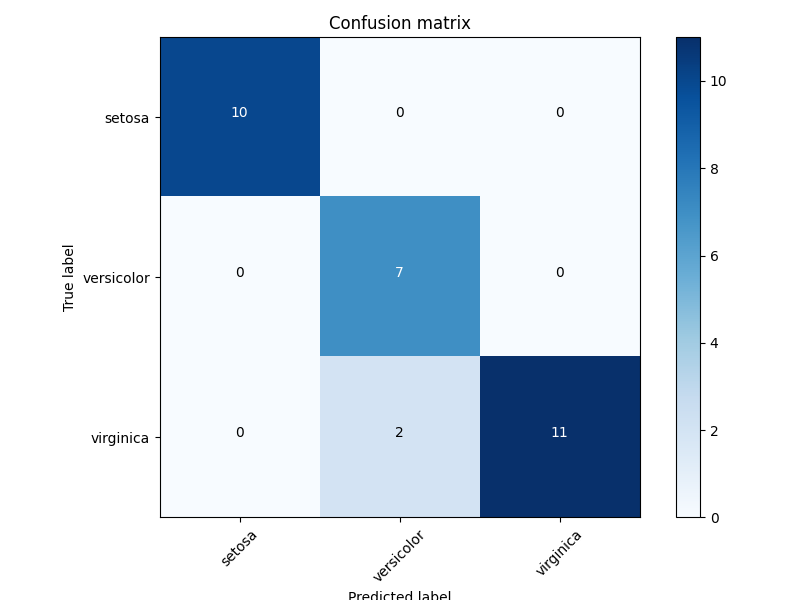

In [17]:
# Display confusion matrix

from IPython.display import Image
Image('reports/confusion_matrix.png')